In [2]:
!pip install opencv-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
digits = datasets.load_digits()
images = digits.images
labels = digits.target

print("Dataset Shape:", images.shape)


Dataset Shape: (1797, 8, 8)


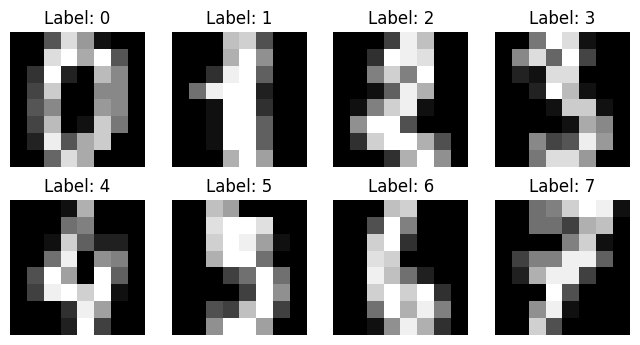

In [5]:
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

In [6]:
def enhance_image(img):
    img = cv2.convertScaleAbs(img, alpha=1.5, beta=20)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    return img

def preprocess_image(img):
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    return img.flatten()


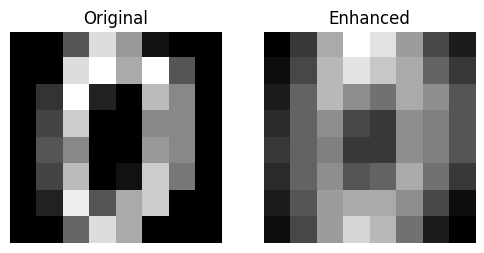

In [7]:
sample = images[0]
enhanced = enhance_image(sample)

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced")
plt.axis("off")

plt.show()


In [8]:
processed_images = []

for img in images:
    enhanced = enhance_image(img)
    processed_images.append(preprocess_image(enhanced))

X = np.array(processed_images)
y = np.array(labels)

print("Feature shape:", X.shape)


Feature shape: (1797, 1024)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)


SVC()

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 98.61%
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  0 39]]


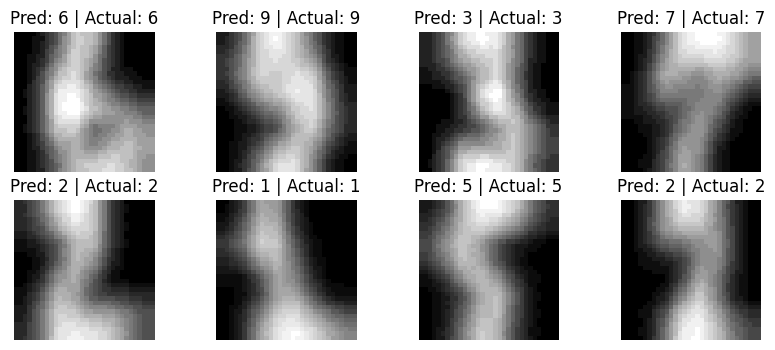

In [12]:
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i].reshape(32, 32), cmap='gray')
    plt.title(f"Pred: {y_pred[i]} | Actual: {y_test[i]}")
    plt.axis("off")
plt.show()


#  Image Classification using OpenCV and SVM

This notebook demonstrates a simple image classification system using:
- OpenCV for image preprocessing and enhancement
- Support Vector Machine (SVM) for classification
- Handwritten Digits Dataset

### Steps Covered:
1. Image preprocessing with OpenCV
2. Image enhancement (brightness, filtering)
3. Model training using SVM
4. Model evaluation and visualization
